In [1]:
import numpy as np
import matplotlib.pyplot as plt

### SVM Implementation using Pegasos
**Formulating SVM as Unconstrained Optimization Problem**

the final SVM objective is :
- $L(w)=\frac{1}{2}w^{T}+c\sum^{i=1}_{m}max(0, 1 - t_{i})$
- $t_{i} = y^{(i)}(w^{T}x^{i}+b)$                     
                     

*Generate Dataset*

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_classes = 2,n_features=2, n_samples = 400,n_informative = 2,random_state=3,n_clusters_per_class= 1, n_redundant = 0)

In [4]:
Y 

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [11]:
#Convert Y values from 0 and 1 into 1 and -1 
# becuase ti = Y[i]*(np.dot(W,X[i].T)+b) = 0 if we use 0
Y[Y==0] = -1 #Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

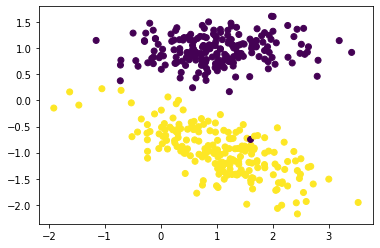

In [12]:
plt.scatter(X[:,0],X[:,1], c= Y)
plt.show()

In [13]:
X.shape

(400, 2)

In [51]:
class SVM:
    
    def __init__(self, C =1.0):
        # C :- how much to palanize
        self.C = C
        self.W = 0
        self.b = 0

    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
               
        return loss[0][0]
    
    def fit(self,X,Y, batch_size = 100,learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #init the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here
        # Weight ans bias update rule that we discussed
        losses = []
        
        for i in range(maxItr):
            # Training loop
            l = self.hingeLoss(W,bias, X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch gradient descent with random shuffling 
            for batch_start in range(0, no_of_samples, batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all the examples in the mini batch
                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Batch gradient is completed
                
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W = W
        self.b = bias
        return W,bias,losses        
    

In [145]:
 mySVM = SVM(C= 10) # C is a palenty constant change it to see 
    # change in graph below
    # higher value of C lesser the margin will be
    

In [146]:
W,b,loss = mySVM.fit(X,Y,maxItr = 80)
print(loss[0])
print(loss[-1])

4000.0
4000.0
76.7239647029523


In [147]:
# ids = np.arange(100)
# np.random.shuffle(ids)
# print(ids) # we will pick batch of the first 10 items for batch gradient

In [148]:
print(loss)

[4000.0, 194.8233980344314, 163.68277962974418, 145.19474095121427, 132.56549941767102, 124.53078247275383, 117.79172415872041, 113.96377651124595, 110.96132860439424, 108.00960024101354, 105.33936546527956, 103.15025943302888, 101.23881368247093, 99.43414448591297, 97.4465786955155, 95.60142130380693, 94.20266762160722, 92.92739899718956, 91.58809455132806, 90.50787578555082, 89.86269764200995, 89.16632046056857, 88.44563251244577, 87.6933328353819, 87.25795859249936, 86.9961590906644, 86.56454560622504, 86.04081680456957, 85.73592749224362, 85.4439632771399, 85.14154809618411, 84.85213748023635, 84.49257860685758, 84.16084998045478, 83.86310636286444, 83.5780332677967, 83.29369573335812, 83.01057153757883, 82.72835768029985, 82.44680563866115, 82.15562618128092, 82.02728075818597, 81.61738487673034, 81.32550701890571, 81.22320212604852, 80.77851522335389, 80.72868064754053, 80.34684681283451, 80.19199084818871, 79.9286504404434, 79.75102290752706, 79.6544399058125, 79.53585499854053,

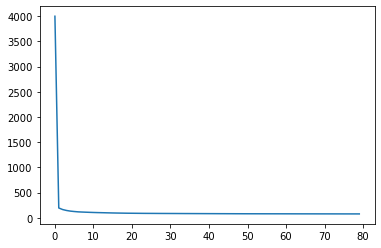

In [149]:
plt.plot(loss)
plt.show()

In [150]:
W,B = mySVM.W, mySVM.b
print(W,B)

[[-0.72371979 -3.24211523]] 0.8200000000000003


In [151]:

def decisionBoundary(w1,w2,bias):
    # or def hyperplane
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    plt.figure(figsize = (10,10))
    plt.plot(x_1,x_2,color = 'red', label = 'Hyperplane WX+B = 0')
    plt.plot(x_1,x_p, marker = 'o',label = '+ve Hyperplane WX+B = 1')
    plt.plot(x_1, x_n, marker = '^', color = 'green',label = '-ve Hyperplane WX+B = -1')
    plt.legend()
    plt.scatter(X[:,0],X[:,1], c = Y)
    plt.show()

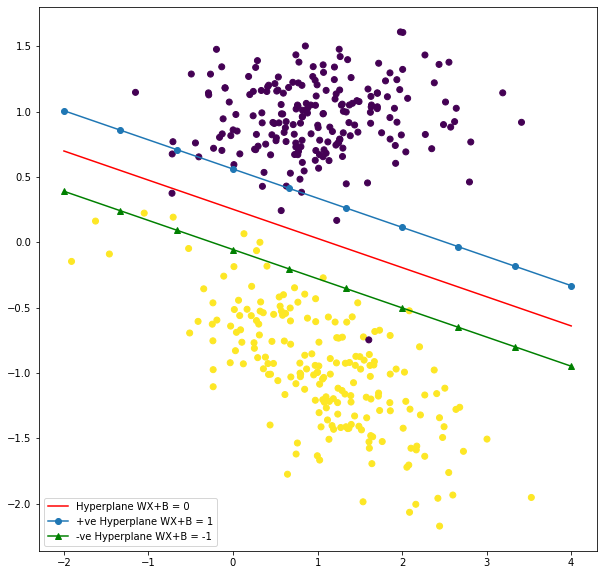

In [152]:
decisionBoundary(W[0,0],W[0,1],B)